In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
def RSI(Df,n):
    
    df = Df.copy()
    df['delta'] = df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain'] = np.where(df['delta'] >= 0, df['delta'], 0)
    df['loss'] = np.where(df['delta'] < 0, abs(df['delta']), 0)
    
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n - 1) * avg_gain[i - 1] + gain[i]) / n)
            avg_loss.append(((n - 1) * avg_loss[i - 1] + loss[i]) / n)
    
    df['avg_gain'] = np.array(avg_gain)
    df['avg_loss'] = np.array(avg_loss)
    df['RS'] = df['avg_gain'] / df['avg_loss']
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    
    return df

def ATR(Df,n):

    df = Df.copy()
    df['H-L'] = abs(df['High'] - df['Low'])
    df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1))
    df['TR'] = df[['H-L','H-PC','L-PC']].max(axis = 1, skipna = False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'], axis = 1)

    return df2

def ADX(DF,n):

    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] 
    df2['DMplus'] = np.where((df2['High'] - df2['High'].shift(1)) > (df2['Low'].shift(1) - df2['Low']), df2['High'] - df2['High'].shift(1), 0)
    df2['DMplus'] = np.where(df2['DMplus'] < 0, 0, df2['DMplus'])
    df2['DMminus'] = np.where((df2['Low'].shift(1) - df2['Low']) > (df2['High'] - df2['High'].shift(1)), df2['Low'].shift(1) - df2['Low'], 0)
    df2['DMminus'] = np.where(df2['DMminus'] < 0, 0, df2['DMminus'])
    
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i - 1] - (TRn[i - 1] / n) + TR[i])
            DMplusN.append(DMplusN[i - 1] - (DMplusN[i - 1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i - 1] - (DMminusN[i - 1]/n) + DMminus[i])
            
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN'] = 100 * (df2['DMplusN'] / df2['TRn'])
    df2['DIminusN'] = 100 * (df2['DMminusN'] / df2['TRn'])
    df2['DIdiff'] = abs(df2['DIplusN'] - df2['DIminusN'])
    df2['DIsum'] = df2['DIplusN'] + df2['DIminusN']
    df2['DX']= 100 * (df2['DIdiff'] / df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    
    for j in range(len(df2)):
        if j < 2*n - 1:
            ADX.append(np.NaN)
        elif j == 2*n - 1:
            ADX.append(df2['DX'][j - n + 1:j + 1].mean())
        elif j > 2*n - 1:
            ADX.append(((n - 1) * ADX[j - 1] + DX[j]) / n)
    df2['ADX'] = np.array(ADX)
    
    return df2['ADX']

In [65]:
apple = pd.read_csv('AAPL.csv')
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.310070,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.302879,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.494736,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.967163,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.811283,82271200
...,...,...,...,...,...,...,...
751,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100
752,2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200
753,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300
754,2020-12-30,135.580002,135.990005,133.399994,133.720001,133.294067,96452100


In [66]:
apple['RSI'] = RSI(apple, 14)['RSI']
apple['ADX'] = ADX(apple, 14).dropna()
apple['Cash'] = 0
apple['Shares'] = 0
apple = apple.filter(['Adj Close', 'RSI', 'ADX', 'Cash', 'Shares'])
apple.head()

,Adj Close,RSI,ADX,Cash,Shares
0,41.310070,NaN,NaN,0,0
1,41.302879,NaN,NaN,0,0
2,41.494736,NaN,NaN,0,0
3,41.967163,NaN,NaN,0,0
4,41.811283,NaN,NaN,0,0


In [69]:
apple_final = apple[apple['ADX'].notnull()]
apple_final = apple_final.reset_index()
apple_final = apple_final.filter(['Adj Close', 'RSI', 'ADX', 'Cash', 'Shares'])
apple_final.iloc[0, 3] = 1000
apple_final.head()

,Adj Close,RSI,ADX,Cash,Shares
0,37.661976,34.134997,32.739724,1000,0
1,39.178955,45.513635,32.956104,0,0
2,39.571445,48.015935,32.900503,0,0
3,40.301041,52.392797,32.050164,0,0
4,41.654278,59.246613,29.934573,0,0


In [70]:
for index in range(len(apple_final)):
    
    clp = apple_final.iloc[index, 0]
    rsi = apple_final.iloc[index, 1]
    adx = apple_final.iloc[index, 2]
    cas = apple_final.iloc[index, 3]
    shr = apple_final.iloc[index, 4]
    
    cash = cas
    shares = 0
    
    if rsi < 50: #buy
        
        if adx > 75:
            #try buying 3 shares
            if (cas > 3*clp):
                shares = 3
                cash = cas - 3*clp
            elif (cash > 2*clp):
                shares = 2
                cash = cas - 2*clp
            elif (cash > clp):
                shares = 1
                cash = cas - clp
            else:
                shares = 0
                cash = cas
                
        if adx > 50:
            #try buying 2 shares
            if (cas > 2*clp):
                shares = 2
                cash = cas - 2*clp
            elif (cash > clp):
                shares = 1
                cash = cas - clp
            else:
                shares = 0
                cash = cas
                
        if adx > 30:
            #try buying 1 share
            if (cas > clp):
                shares = 1
                cash = cas - clp
            else:
                shares = 0
                cash = cas
                
    if rsi > 50: #sell
        
        if adx > 75:
            #try selling 3 shares
            if (shr >= 3):
                shares = -3
                cash = cas + 3*clp
            elif (shr >= 2):
                shares = -2
                cash = cas + 2*clp
            elif (shr >= 1):
                shares = -1
                cash = cas + clp
            else:
                shares = 0
                cash = cas
                
        if adx > 50:
            #try selling 2 shares
            if (shr >= 2):
                shares = -2
                cash = cas + 2*clp
            elif (shr >= 1):
                shares = -1
                cash = cas + clp
            else:
                shares = 0
                cash = cas
                
        if adx > 30:
            #try selling 1 share
            if (shr >= 1):
                shares = -1
                cash = cas + clp
            else:
                shares = 0
                cash = cas
                
    apple_final.iloc[index, 3] = cash
    apple_final.iloc[index, 4] = apple_final.iloc[index, 4] + shares
    
    try:
        apple_final.iloc[index + 1, 3] = apple_final.iloc[index, 3]
        apple_final.iloc[index + 1, 4] = apple_final.iloc[index, 4]
    except:
        pass
        
apple_final

,Adj Close,RSI,ADX,Cash,Shares
0,37.661976,34.134997,32.739724,962.338024,1
1,39.178955,45.513635,32.956104,923.159069,2
2,39.571445,48.015935,32.900503,883.587624,3
3,40.301041,52.392797,32.050164,923.888665,2
4,41.654278,59.246613,29.934573,923.888665,2
...,...,...,...,...,...
724,131.549637,67.920972,20.490433,394.964759,12
725,136.254608,73.647446,22.103940,394.964759,12
726,134.440399,68.564882,23.837383,394.964759,12
727,133.294067,65.489462,25.041169,394.964759,12


In [71]:
apple_final['Net Worth'] = apple_final['Cash'] + apple_final['Shares'] * apple_final['Adj Close']
apple_final

,Adj Close,RSI,ADX,Cash,Shares,Net Worth
0,37.661976,34.134997,32.739724,962.338024,1,1000.000000
1,39.178955,45.513635,32.956104,923.159069,2,1001.516979
2,39.571445,48.015935,32.900503,883.587624,3,1002.301959
3,40.301041,52.392797,32.050164,923.888665,2,1004.490747
4,41.654278,59.246613,29.934573,923.888665,2,1007.197221
...,...,...,...,...,...,...
724,131.549637,67.920972,20.490433,394.964759,12,1973.560403
725,136.254608,73.647446,22.103940,394.964759,12,2030.020055
726,134.440399,68.564882,23.837383,394.964759,12,2008.249547
727,133.294067,65.489462,25.041169,394.964759,12,1994.493563


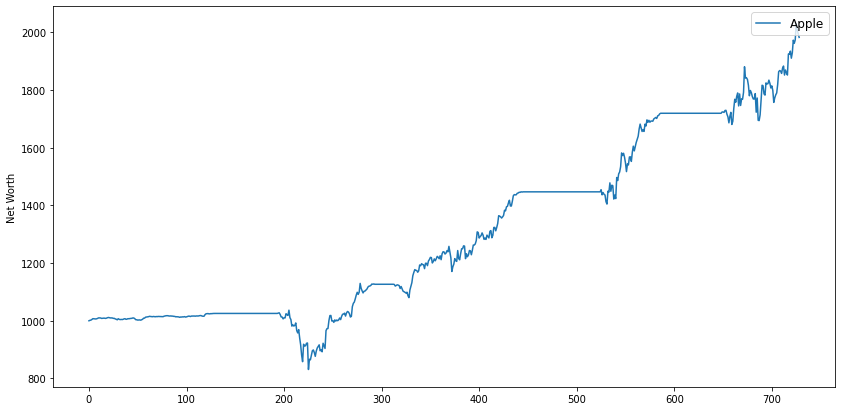

In [72]:
plt.figure(figsize = (14, 7))
plt.plot(apple_final.index, apple_final['Net Worth'], label = 'Apple')
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Net Worth')
plt.show()

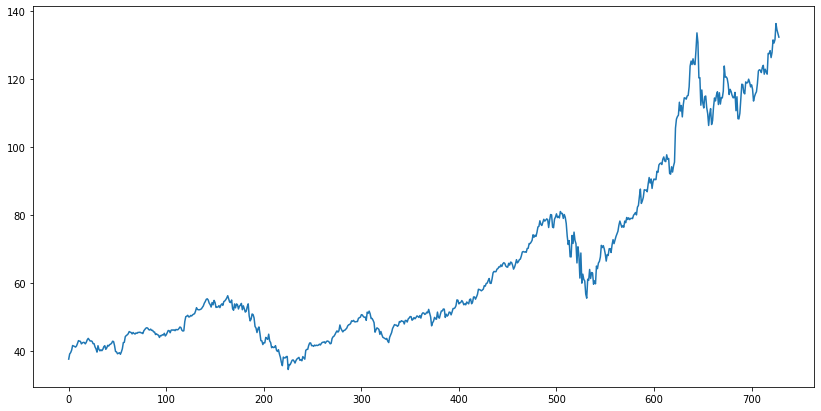

In [75]:
plt.figure(figsize = (14, 7))
plt.plot(apple_final.index, apple_final['Adj Close'], label = 'Closing Price')

<AxesSubplot:>

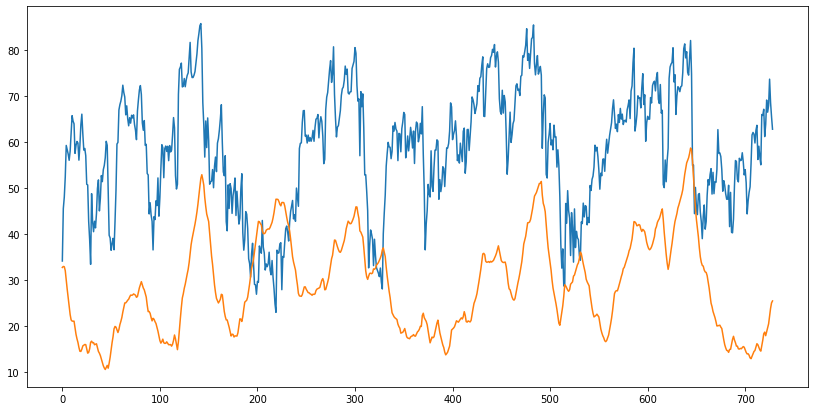

In [77]:
plt.figure(figsize = (14, 7))
apple_final['RSI'].plot() #blue
apple_final['ADX'].plot() #orange